In [1]:
import os
import glob
import json
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [4]:
res_cv_path = np.sort(glob.glob('/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/train_resnet_fold*/log'))
dist = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/log_analysis'
os.makedirs(dist, exist_ok=True)

res_log = []
for p in res_cv_path:
    with open(p, 'r') as f:
        res_log.append(json.load(f))
        
res_log[0][str(1)]

{'epoch': 1,
 'loss_train': 2.5332388877868652,
 'accuracy_train': 0.08602150537634409,
 'balanced_accuracy_train': 0.08602150537634408,
 'macro_f1_train': 0.07632404440205633,
 'micro_f1_train': 0.07632404440205633,
 'weighted_f1_train': 0.07632404440205633,
 'loss_validation': 2.5503110885620117,
 'accuracy_validation': 0.08641975308641975,
 'balanced_accuracy_validation': 0.08333333333333333,
 'macro_f1_validation': 0.013257575757575758,
 'micro_f1_validation': 0.013257575757575758,
 'weighted_f1_validation': 0.013748597081930415}

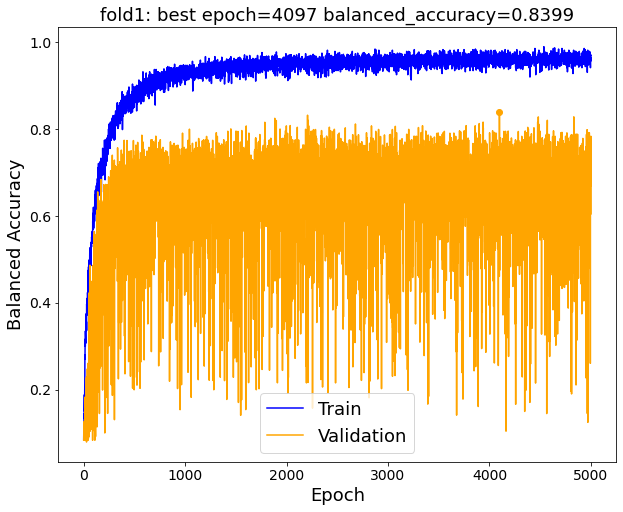

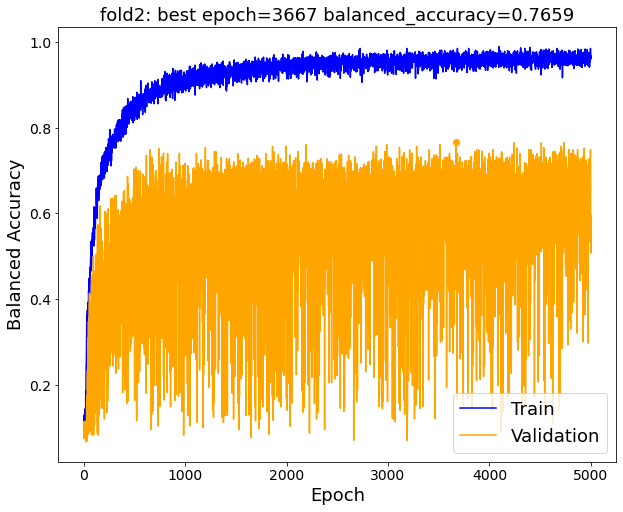

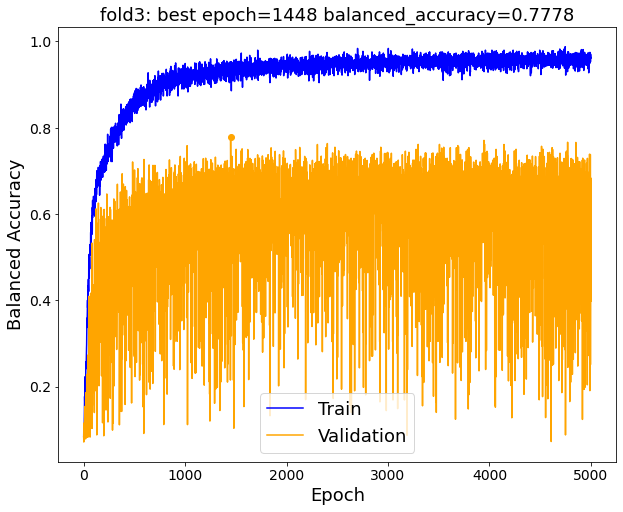

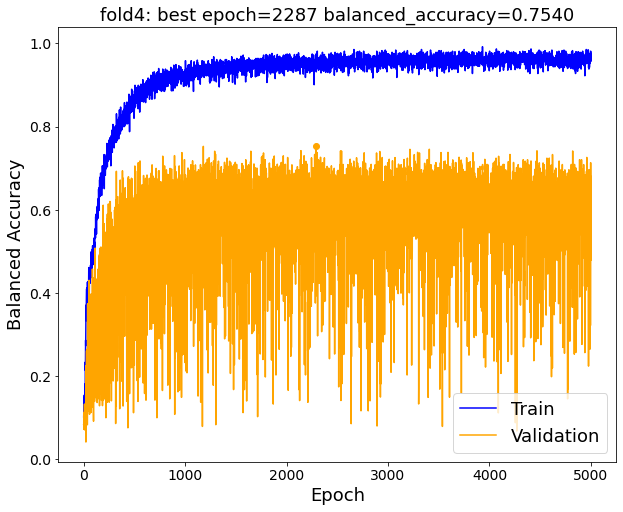

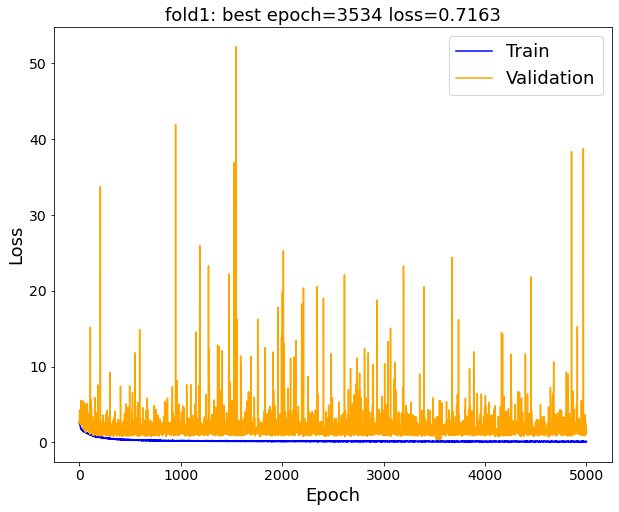

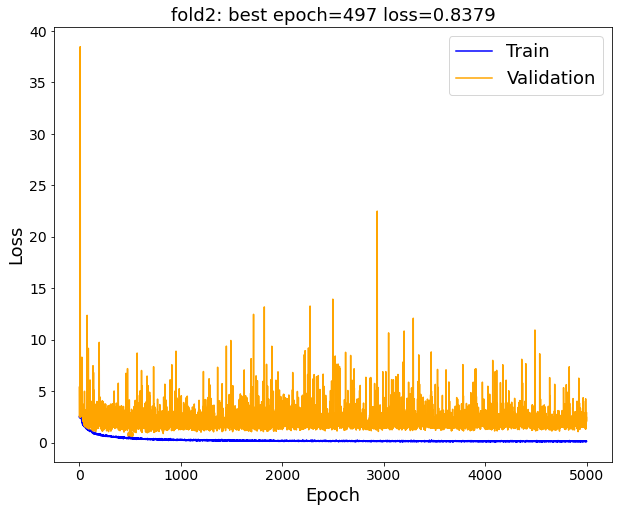

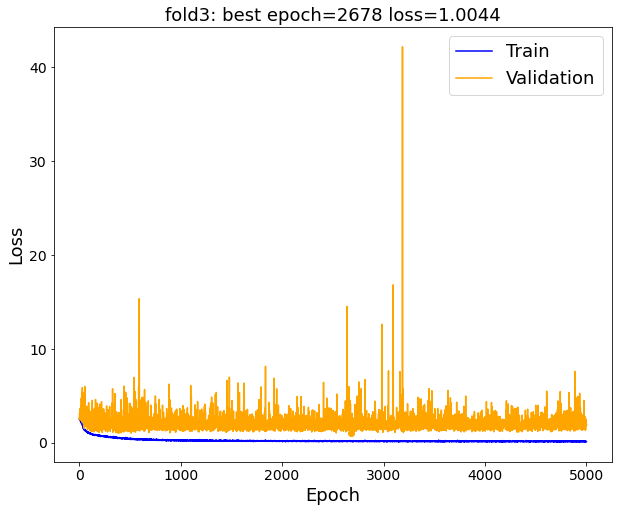

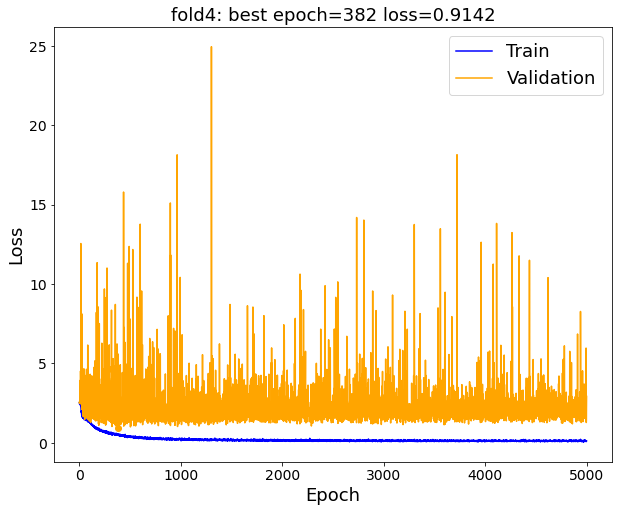

In [5]:
# Accuracy
# plt.figure(figsize=(18, 10))
for k in range(len(res_log)):
    train, val, epoch = [], [], []
    for n in range(1, len(res_log[k]) + 1):
#         train.append(res_log[k][str(n)]['accuracy_train'])
#         val.append(res_log[k][str(n)]['accuracy_validation'])
        train.append(res_log[k][str(n)]['balanced_accuracy_train'])
        val.append(res_log[k][str(n)]['balanced_accuracy_validation'])
        epoch.append(res_log[k][str(n)]['epoch'])
#     plt.subplot(2, 3, k+1)
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train, label='Train', color='blue')
    plt.plot(epoch, val, label='Validation', color='orange')
    plt.scatter(np.argmax(val)+1, np.max(val), marker='o', color='orange')
    plt.xlabel('Epoch', size=18)
#     plt.ylabel('Accuracy')
#     plt.title('fold{}: best epoch={} accuracy={:.4f}'.format(k+1, np.argmax(val), np.max(val)))
    plt.ylabel('Balanced Accuracy', size=18)
    plt.title('fold{}: best epoch={} balanced_accuracy={:.4f}'.format(k+1, np.argmax(val), np.max(val)), size=18)
   # plt.xlim([0, 200])
    #plt.ylim([0, 0.7])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.legend(fontsize=18)
#     filename = os.path.join(dist, 'accuracy_fold{}.pdf'.format(k))
    filename = os.path.join(dist, 'balanced_accuracy_fold{}.pdf'.format(k+1))
    plt.savefig(filename)
    
# Loss
# plt.figure(figsize=(18, 10))
for k in range(len(res_log)):
    train, val, epoch = [], [], []
    for n in range(1, len(res_log[k]) + 1):
        train.append(res_log[k][str(n)]['loss_train'])
        val.append(res_log[k][str(n)]['loss_validation'])
        epoch.append(res_log[k][str(n)]['epoch'])
#     plt.subplot(2, 3, k+1)
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train, label='Train', color='blue')
    plt.plot(epoch, val, label='Validation', color='orange')
    plt.scatter(np.argmin(val)+1, np.min(val), marker='o', color='orange')
    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    plt.title('fold{}: best epoch={} loss={:.4f}'.format(k+1, np.argmin(val), np.min(val)), size=18)
    #plt.xlim([0, 200])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.legend(fontsize=18)
    filename = os.path.join(dist, 'loss_fold{}.pdf'.format(k+1))
    plt.savefig(filename)

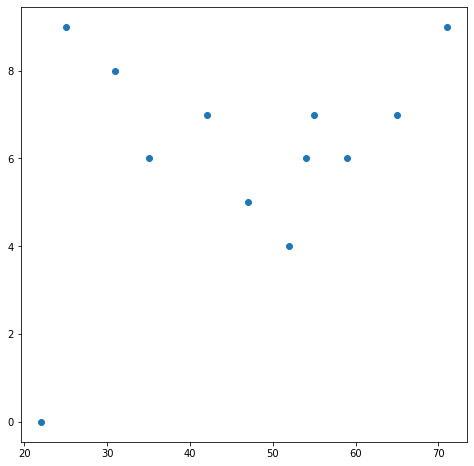

In [5]:
pred = [
    9, 6, 0, 7, 5, 8, 6, 4, 6, 7, 9, 7
]
sample = [
    71, 54, 22, 42, 47, 31, 59, 52, 35, 55, 25, 65
]

plt.figure(figsize=(8, 8))
plt.scatter(sample, pred)